# Arrest Prediction

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
violation_data = pd.read_csv('traffic_violations.csv')
violation_data.head()

stop_date stop_time  country_name driver_gender  driver_age_raw  \
0   1/2/2005      1:55           NaN             M          1985.0   
1  1/18/2005      8:15           NaN             M          1965.0   
2  1/23/2005     23:15           NaN             M          1972.0   
3  2/20/2005     17:15           NaN             M          1986.0   
4  3/14/2005     10:00           NaN             F          1984.0   

   driver_age driver_race     violation_raw violation search_conducted  \
0        20.0       White          Speeding  Speeding            False   
1        40.0       White          Speeding  Speeding            False   
2        33.0       White          Speeding  Speeding            False   
3        19.0       White  Call for Service     Other            False   
4        21.0       White          Speeding  Speeding            False   

  search_type   stop_outcome is_arrested stop_duration drugs_related_stop  
0         NaN       Citation       False      0-15 Min              False  
1         NaN       Citation       False      0-15 Min              False  
2         NaN       Citation       False      0-15 Min              False  
3         NaN  Arrest Driver        True     16-30 Min              False  
4         NaN       Citation       False      0-15 Min              False

In [3]:
# dropping empty columns
violation_data.drop(['country_name', 'search_type'], axis = 1, inplace = True)

In [4]:
violation_data.isnull().sum()

stop_date                1
stop_time                1
driver_gender         3386
driver_age_raw        3378
driver_age            3620
driver_race           3385
violation_raw         3385
violation             3385
search_conducted         1
stop_outcome          3385
is_arrested           3385
stop_duration         3385
drugs_related_stop       1
dtype: int64

In [5]:
# dropping rows with NaN values
violation_data = violation_data.dropna(how = 'any')

In [6]:
violation_data.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [7]:
# splitting stop_date into year, month and day format
violation_data['stop_year'] = violation_data['stop_date'].apply(lambda x: int(x.split('/')[2]))
violation_data['stop_month'] = violation_data['stop_date'].apply(lambda x: int(x.split('/')[0]))
violation_data['stop_day'] = violation_data['stop_date'].apply(lambda x: int(x.split('/')[1]))

In [8]:
violation_data.drop('stop_date', axis = 1, inplace = True)
violation_data.head(3)

stop_time driver_gender  driver_age_raw  driver_age driver_race  \
0      1:55             M          1985.0        20.0       White   
1      8:15             M          1965.0        40.0       White   
2     23:15             M          1972.0        33.0       White   

  violation_raw violation search_conducted stop_outcome is_arrested  \
0      Speeding  Speeding            False     Citation       False   
1      Speeding  Speeding            False     Citation       False   
2      Speeding  Speeding            False     Citation       False   

  stop_duration drugs_related_stop  stop_year  stop_month  stop_day  
0      0-15 Min              False       2005           1         2  
1      0-15 Min              False       2005           1        18  
2      0-15 Min              False       2005           1        23

In [9]:
violation_data['stop_time'] = violation_data['stop_time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60)
violation_data.head(3)

stop_time driver_gender  driver_age_raw  driver_age driver_race  \
0   1.916667             M          1985.0        20.0       White   
1   8.250000             M          1965.0        40.0       White   
2  23.250000             M          1972.0        33.0       White   

  violation_raw violation search_conducted stop_outcome is_arrested  \
0      Speeding  Speeding            False     Citation       False   
1      Speeding  Speeding            False     Citation       False   
2      Speeding  Speeding            False     Citation       False   

  stop_duration drugs_related_stop  stop_year  stop_month  stop_day  
0      0-15 Min              False       2005           1         2  
1      0-15 Min              False       2005           1        18  
2      0-15 Min              False       2005           1        23

In [10]:
violation_data['driver_gender'] = violation_data['driver_gender'].map({'M':1, 'F':0})
violation_data.head()

stop_time  driver_gender  driver_age_raw  driver_age driver_race  \
0   1.916667              1          1985.0        20.0       White   
1   8.250000              1          1965.0        40.0       White   
2  23.250000              1          1972.0        33.0       White   
3  17.250000              1          1986.0        19.0       White   
4  10.000000              0          1984.0        21.0       White   

      violation_raw violation search_conducted   stop_outcome is_arrested  \
0          Speeding  Speeding            False       Citation       False   
1          Speeding  Speeding            False       Citation       False   
2          Speeding  Speeding            False       Citation       False   
3  Call for Service     Other            False  Arrest Driver        True   
4          Speeding  Speeding            False       Citation       False   

  stop_duration drugs_related_stop  stop_year  stop_month  stop_day  
0      0-15 Min              False       2005           1         2  
1      0-15 Min              False       2005           1        18  
2      0-15 Min              False       2005           1        23  
3     16-30 Min              False       2005           2        20  
4      0-15 Min              False       2005           3        14

In [11]:
violation_data.drop(['driver_age_raw'], axis = 1, inplace = True)
violation_data['violation'] = violation_data['violation_raw'].apply(lambda x: x)
violation_data.drop(['violation_raw'], axis = 1, inplace = True)

In [12]:
violation_data['search_conducted'] = violation_data['search_conducted'].apply(lambda x: 1 if x == True else 0)
violation_data['is_arrested'] = violation_data['is_arrested'].apply(lambda x: 1 if x == True else 0)
violation_data['drugs_related_stop'] = violation_data['drugs_related_stop'].apply(lambda x: 1 if x == True else 0)
violation_data.head(3)

stop_time  driver_gender  driver_age driver_race violation  \
0   1.916667              1        20.0       White  Speeding   
1   8.250000              1        40.0       White  Speeding   
2  23.250000              1        33.0       White  Speeding   

   search_conducted stop_outcome  is_arrested stop_duration  \
0                 0     Citation            0      0-15 Min   
1                 0     Citation            0      0-15 Min   
2                 0     Citation            0      0-15 Min   

   drugs_related_stop  stop_year  stop_month  stop_day  
0                   0       2005           1         2  
1                   0       2005           1        18  
2                   0       2005           1        23

In [13]:
violation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49340 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_time           49340 non-null  float64
 1   driver_gender       49340 non-null  int64  
 2   driver_age          49340 non-null  float64
 3   driver_race         49340 non-null  object 
 4   violation           49340 non-null  object 
 5   search_conducted    49340 non-null  int64  
 6   stop_outcome        49340 non-null  object 
 7   is_arrested         49340 non-null  int64  
 8   stop_duration       49340 non-null  object 
 9   drugs_related_stop  49340 non-null  int64  
 10  stop_year           49340 non-null  int64  
 11  stop_month          49340 non-null  int64  
 12  stop_day            49340 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 5.3+ MB


In [14]:
violation_data.describe()

stop_time  driver_gender    driver_age  search_conducted  \
count  49340.000000   49340.000000  49340.000000      49340.000000   
mean      12.075089       0.736826     34.172254          0.042217   
std        6.526442       0.440360     12.770223          0.201087   
min        0.000000       0.000000     15.000000          0.000000   
25%        8.116667       0.000000     23.000000          0.000000   
50%       11.566667       1.000000     31.000000          0.000000   
75%       16.566667       1.000000     43.000000          0.000000   
max       23.983333       1.000000     88.000000          1.000000   

        is_arrested  drugs_related_stop     stop_year    stop_month  \
count  49340.000000        49340.000000  49340.000000  49340.000000   
mean       0.037860            0.008026   2008.029591      6.411674   
std        0.190859            0.089228      1.786167      3.451987   
min        0.000000            0.000000   2005.000000      1.000000   
25%        0.000000            0.000000   2006.000000      3.000000   
50%        0.000000            0.000000   2008.000000      6.000000   
75%        0.000000            0.000000   2010.000000      9.000000   
max        1.000000            1.000000   2011.000000     12.000000   

           stop_day  
count  49340.000000  
mean      15.588285  
std        8.812781  
min        1.000000  
25%        8.000000  
50%       15.000000  
75%       23.000000  
max       31.000000

### Exploratory data analysis

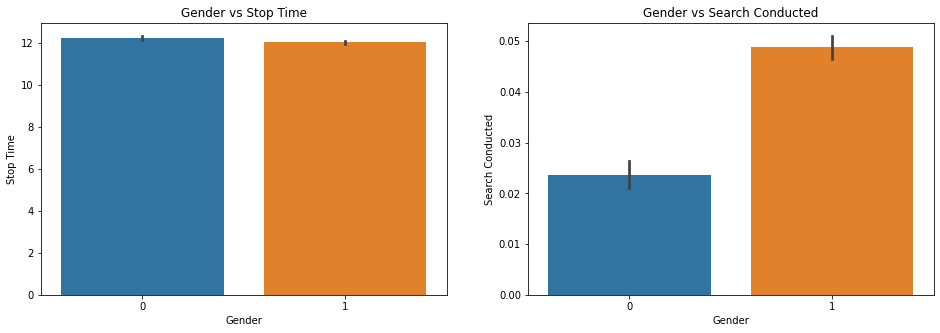

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x = 'driver_gender', y = 'stop_time',data = violation_data)
plt.title('Gender vs Stop Time')
plt.xlabel('Gender')
plt.ylabel('Stop Time')

plt.subplot(1,2,2)
sns.barplot(x = 'driver_gender', y = 'search_conducted', data = violation_data)
plt.title('Gender vs Search Conducted')
plt.xlabel('Gender')
plt.ylabel('Search Conducted')
plt.show()

plt.show()

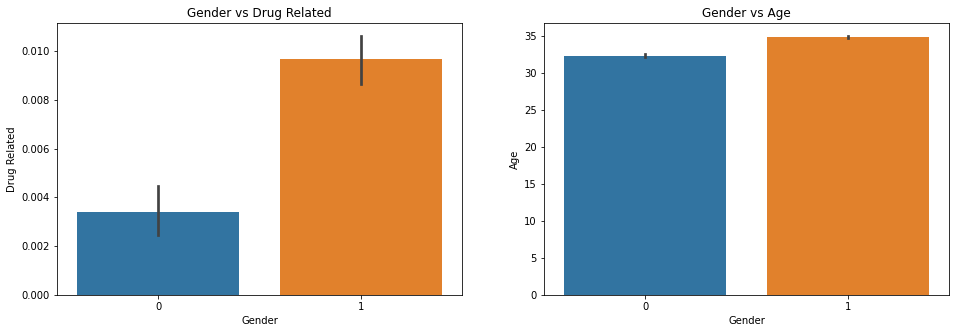

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x = 'driver_gender',y = 'drugs_related_stop', data = violation_data)
plt.title('Gender vs Drug Related')
plt.xlabel('Gender')
plt.ylabel('Drug Related')

plt.subplot(1,2,2)
sns.barplot(x = 'driver_gender', y = 'driver_age', data = violation_data)
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

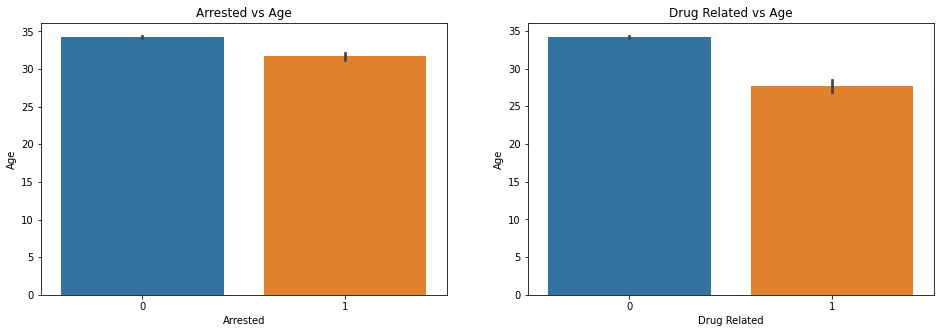

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x = 'is_arrested', y = 'driver_age', data = violation_data)
plt.title('Arrested vs Age')
plt.xlabel('Arrested')
plt.ylabel('Age')

plt.subplot(1,2,2)
sns.barplot(x = 'drugs_related_stop', y = 'driver_age', data = violation_data)
plt.title('Drug Related vs Age')
plt.xlabel('Drug Related')
plt.ylabel('Age')

plt.show()

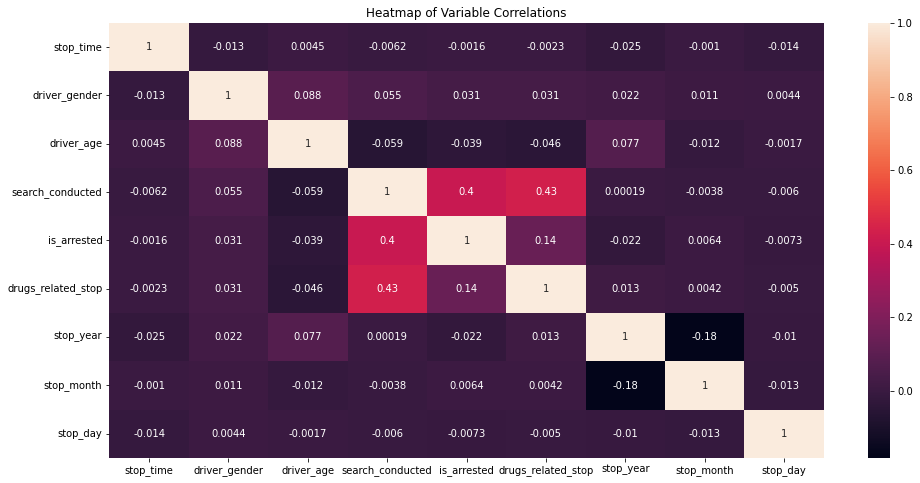

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(violation_data.corr(), annot = True)
plt.title('Heatmap of Variable Correlations')
plt.show()

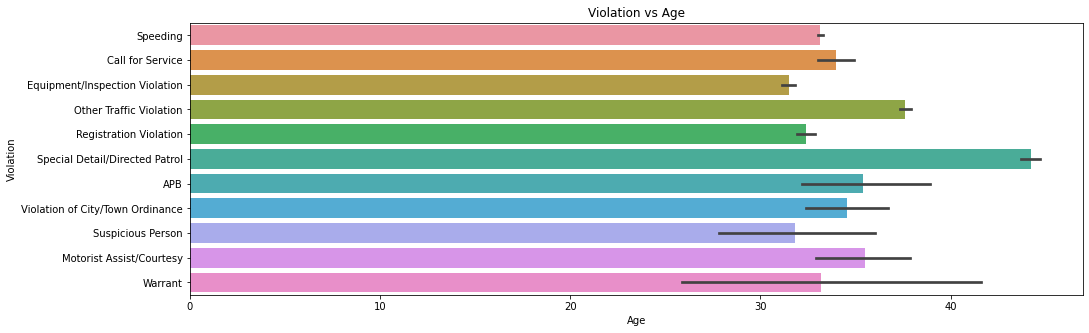

In [19]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'driver_age', y = 'violation', data = violation_data)
plt.title('Violation vs Age')
plt.ylabel('Violation')
plt.xlabel('Age')
# plt.grid()
plt.show()

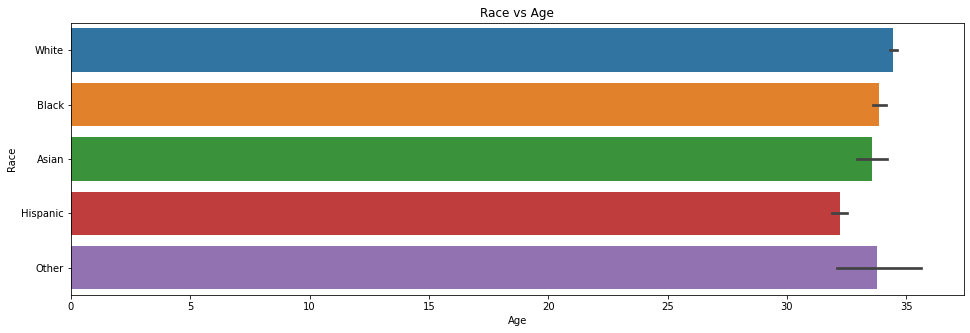

In [20]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'driver_age', y = 'driver_race', data = violation_data)
plt.title('Race vs Age')
plt.ylabel('Race')
plt.xlabel('Age')
plt.show()

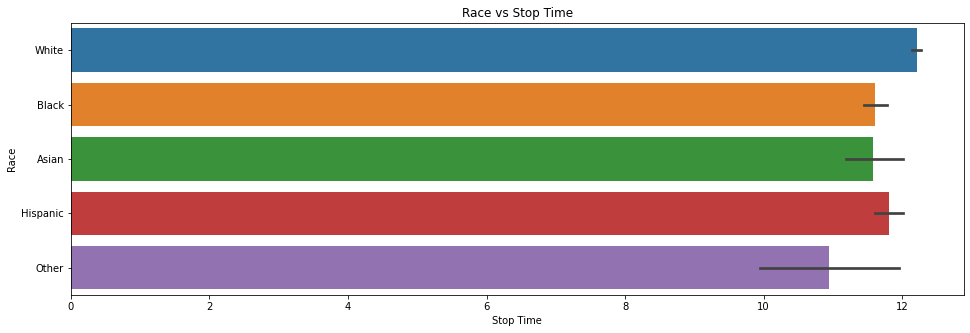

In [21]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'stop_time', y = 'driver_race', data = violation_data)
plt.title('Race vs Stop Time')
plt.ylabel('Race')
plt.xlabel('Stop Time')
plt.show()

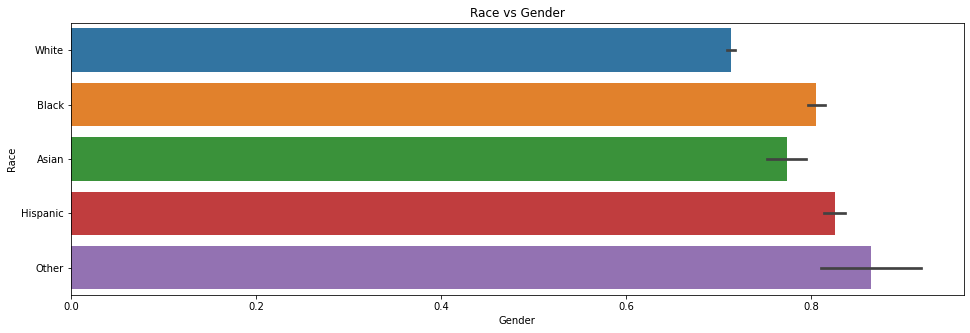

In [22]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'driver_gender', y = 'driver_race', data = violation_data)
plt.title('Race vs Gender')
plt.ylabel('Race')
plt.xlabel('Gender')
plt.show()

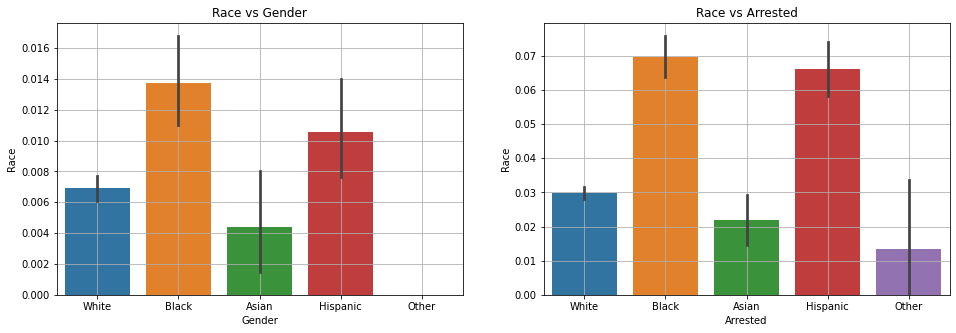

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(y = 'drugs_related_stop', x = 'driver_race', data = violation_data)
plt.title('Race vs Gender')
plt.ylabel('Race')
plt.xlabel('Gender')
plt.grid()

plt.subplot(1,2,2)
sns.barplot(y = 'is_arrested', x = 'driver_race', data = violation_data)
plt.title('Race vs Arrested')
plt.ylabel('Race')
plt.xlabel('Arrested')
plt.grid()

plt.show()

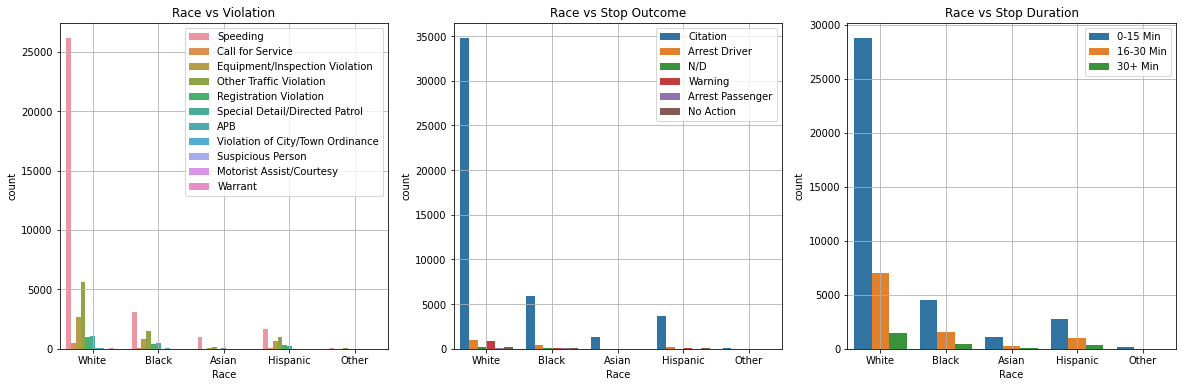

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.countplot(x = 'driver_race', hue = 'violation', data = violation_data)
plt.title('Race vs Violation')
plt.xlabel('Race')
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(1,3,2)
sns.countplot(x = 'driver_race', hue = 'stop_outcome', data = violation_data)
plt.title('Race vs Stop Outcome')
plt.xlabel('Race')
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(1,3,3)
sns.countplot(x = 'driver_race', hue = 'stop_duration', data = violation_data)
plt.title('Race vs Stop Duration')
plt.xlabel('Race')
plt.legend(loc = 'upper right')
plt.grid()

plt.show()

### Model building
#### We will build the machine learning model to predict whether the person gets arrested or not. 
#### Hence, we will drop the column 'stop_outcome' as it direct indicator of target variable.

In [25]:
violation_data.drop(['stop_outcome'], axis = 1, inplace = True)

In [26]:
violation_data.head(3)

stop_time  driver_gender  driver_age driver_race violation  \
0   1.916667              1        20.0       White  Speeding   
1   8.250000              1        40.0       White  Speeding   
2  23.250000              1        33.0       White  Speeding   

   search_conducted  is_arrested stop_duration  drugs_related_stop  stop_year  \
0                 0            0      0-15 Min                   0       2005   
1                 0            0      0-15 Min                   0       2005   
2                 0            0      0-15 Min                   0       2005   

   stop_month  stop_day  
0           1         2  
1           1        18  
2           1        23

In [27]:
# converting data into categorical form
temp = pd.get_dummies(violation_data['driver_race'], drop_first = False)
violation_data = pd.concat([violation_data, temp], axis = 1)
violation_data.drop('driver_race', axis = 1, inplace = True)

temp = pd.get_dummies(violation_data['violation'], drop_first = False)
violation_data = pd.concat([violation_data, temp], axis = 1)
violation_data.drop('violation', axis = 1, inplace = True)

temp = pd.get_dummies(violation_data['stop_duration'], drop_first = False)
violation_data = pd.concat([violation_data, temp], axis = 1)
violation_data.drop('stop_duration', axis = 1, inplace = True)

temp = pd.get_dummies(violation_data['stop_year'], drop_first = False)
violation_data = pd.concat([violation_data, temp], axis = 1)
violation_data.drop('stop_year', axis = 1, inplace = True)

violation_data.head()

stop_time  driver_gender  driver_age  search_conducted  is_arrested  \
0   1.916667              1        20.0                 0            0   
1   8.250000              1        40.0                 0            0   
2  23.250000              1        33.0                 0            0   
3  17.250000              1        19.0                 0            1   
4  10.000000              0        21.0                 0            0   

   drugs_related_stop  stop_month  stop_day  Asian  Black  ...  0-15 Min  \
0                   0           1         2      0      0  ...         1   
1                   0           1        18      0      0  ...         1   
2                   0           1        23      0      0  ...         1   
3                   0           2        20      0      0  ...         0   
4                   0           3        14      0      0  ...         1   

   16-30 Min  30+ Min  2005  2006  2007  2008  2009  2010  2011  
0          0        0     1     0     0     0     0     0     0  
1          0        0     1     0     0     0     0     0     0  
2          0        0     1     0     0     0     0     0     0  
3          1        0     1     0     0     0     0     0     0  
4          0        0     1     0     0     0     0     0     0  

[5 rows x 34 columns]

In [29]:
violation_data['is_arrested'].value_counts()

0    47472
1     1868
Name: is_arrested, dtype: int64

In [30]:
# since there is class imbalance, we will have to apply some weighted balance

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = violation_data.drop('is_arrested', axis = 1)
y = violation_data['is_arrested']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)
X_train.head()

stop_time  driver_gender  driver_age  search_conducted  \
7327    2.533333              1        23.0                 0   
26440  11.933333              1        52.0                 0   
48145   8.083333              0        25.0                 0   
32915  15.800000              1        30.0                 0   
40592  12.900000              1        30.0                 0   

       drugs_related_stop  stop_month  stop_day  Asian  Black  Hispanic  ...  \
7327                    0           6        11      0      1         0  ...   
26440                   0           6         6      0      0         0  ...   
48145                   0           3        11      0      0         0  ...   
32915                   0           2        28      0      0         0  ...   
40592                   0           2        22      0      0         0  ...   

       0-15 Min  16-30 Min  30+ Min  2005  2006  2007  2008  2009  2010  2011  
7327          1          0        0     0     1     0     0     0     0     0  
26440         0          0        1     0     0     0     1     0     0     0  
48145         1          0        0     0     0     0     0     0     0     1  
32915         1          0        0     0     0     0     0     1     0     0  
40592         1          0        0     0     0     0     0     0     1     0  

[5 rows x 33 columns]

In [34]:
y_train.head()

7327     0
26440    0
48145    0
32915    0
40592    0
Name: is_arrested, dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve

In [36]:
Model = RandomForestClassifier(random_state = 100, n_jobs = -1, class_weight = 'balanced')

params = {'n_estimators':[200],
          'min_samples_leaf':[40,60,100,150,200],
          'max_depth':[3,5,10,15,20],
          'max_features':[0.05,0.1,0.15,0.2,0.25]}

grid_search = GridSearchCV(estimator = Model, 
                           param_grid = params, 
                           verbose = 1, 
                           n_jobs = -1, 
                           scoring = 'accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'min_samples_leaf': [40, 60, 100, 150, 200],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [37]:
Model_best = grid_search.best_estimator_
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

Train Accuracy : 88.85032428050263
Train Recall : 88.58294157152451


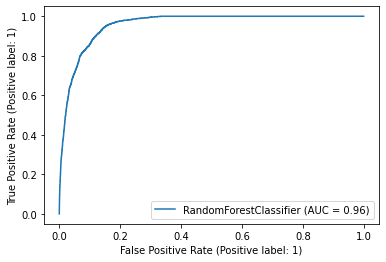

In [46]:
print('Train Accuracy :', accuracy_score(y_train, y_train_pred)*100)
print('Train Recall :', recall_score(y_train, y_train_pred)*100)

plot_roc_curve(Model_best, X_train, y_train)
plt.show()

Test Accuracy : 88.12322659100121
Test Recall : 80.21108179419525


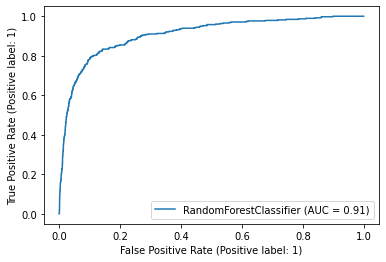

In [48]:
print('Test Accuracy :', accuracy_score(y_test, y_test_pred)*100)
print('Test Recall :', recall_score(y_test, y_test_pred)*100)

plot_roc_curve(Model_best, X_test, y_test)
plt.show()

In [49]:
Feature_Importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': Model_best.feature_importances_})
Feature_Importance.sort_values('Importance', ascending = False, inplace = True)
Feature_Importance.set_index('Feature', inplace = True)
Feature_Importance.head(10)

Importance
Feature                                   
0-15 Min                          0.246876
search_conducted                  0.186913
Speeding                          0.118386
30+ Min                           0.099797
16-30 Min                         0.075626
driver_age                        0.046095
stop_time                         0.041487
stop_day                          0.024755
stop_month                        0.022104
Special Detail/Directed Patrol    0.019745

In [50]:
# We have got the top 10 variables that contribute to the prediction

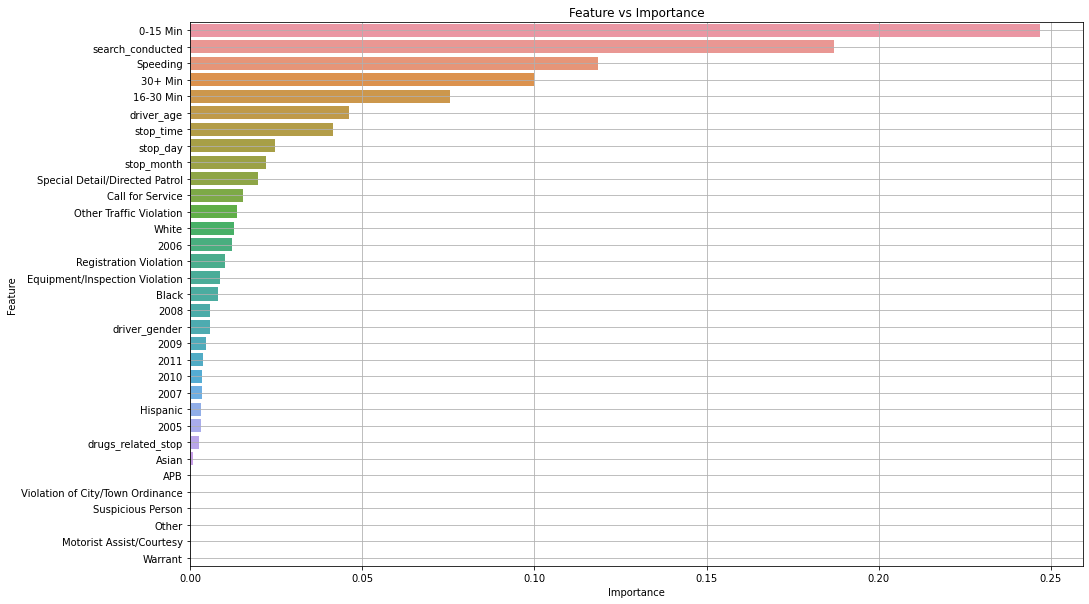

In [55]:
# plot of all feature importances:
plt.figure(figsize=(16, 10))
sns.barplot(x = Feature_Importance.Importance, y = Feature_Importance.index)
plt.title('Feature vs Importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.grid()
plt.show()

In [56]:
# --- END OF THE PROJECT ---